In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score 

dataset = pd.read_csv('direct_marketing_dataset.csv', sep=';')

#encoding the categorical data columns using pd.get_dummies
#encoding the categorical data columns using pd.get_dummies
dataset = pd.get_dummies(dataset, columns = ['job', 'marital','education','default', 'housing', 'loan','contact', 'month','poutcome'])
dataset.head()

# Defining columns for the model
X = dataset.drop(["campaign", "duration","y"], axis =1)
y = dataset['y']

# splitting the data into train and test 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy = 0.37, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#drop index for y
y_train_smote_reset = y_train_smote.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

#recreate both train and test dataframes
train = pd.concat([X_train_smote, y_train_smote_reset], axis=1)
test = pd.concat([X_test, y_test_reset], axis=1)

# Importing Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# calling the decision tree method 
# setting max_depth to 4
# and min sample per leaf at 1
# this mean ther must be at least 1 samples in each leaf
model = DecisionTreeClassifier(max_depth=4, class_weight='balanced', min_samples_leaf=1, random_state = 42)
# fitting the decision tree onto the training data
model.fit(X_train_smote, y_train_smote)

##################Evaluating your Decision Tree Model###################

### Generate your predicitions###
y_pred = model.predict(X_test)

### Generate a Confusion matrix as a dataframe - conf matrix_df###
conf_matrix_values = confusion_matrix(y_test, y_pred)
class_labels = ['no', 'yes']

###Create dataframe from the confusion matrix ###
Conf_matrix = pd.DataFrame(conf_matrix_values, index=['Actual Negative', 'Actual Positive'], columns = ['Predicted Negative', 'Predicted Positive'])

###################################

###Conpile your matrics into a dataframe - metrics_df

report_dict = classification_report(y_test, y_pred, output_dict=True)
metric_df = pd.DataFrame(report_dict)
metric_df = metric_df.T

########feature importence######## 

feature_importances = model.feature_importances_

# Get feature names
feature_names = X.columns.tolist()

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame to show the most important features at the top
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df.reset_index(drop=True, inplace=True)

#to review in python Notebook. will be visualised as a simple table in PBI

print("nConfusion Matrix:")
print(metric_df)

nConfusion Matrix:
              precision    recall  f1-score     support
no             0.929092  0.657445  0.770013  7952.00000
yes            0.202576  0.634280  0.307078  1091.00000
accuracy       0.654650  0.654650  0.654650     0.65465
macro avg      0.565834  0.645863  0.538545  9043.00000
weighted avg   0.841441  0.654650  0.714161  9043.00000


In [2]:
metric_df

,precision,recall,f1-score,support
no,0.929092,0.657445,0.770013,7952.00000
yes,0.202576,0.634280,0.307078,1091.00000
accuracy,0.654650,0.654650,0.654650,0.65465
macro avg,0.565834,0.645863,0.538545,9043.00000
weighted avg,0.841441,0.654650,0.714161,9043.00000


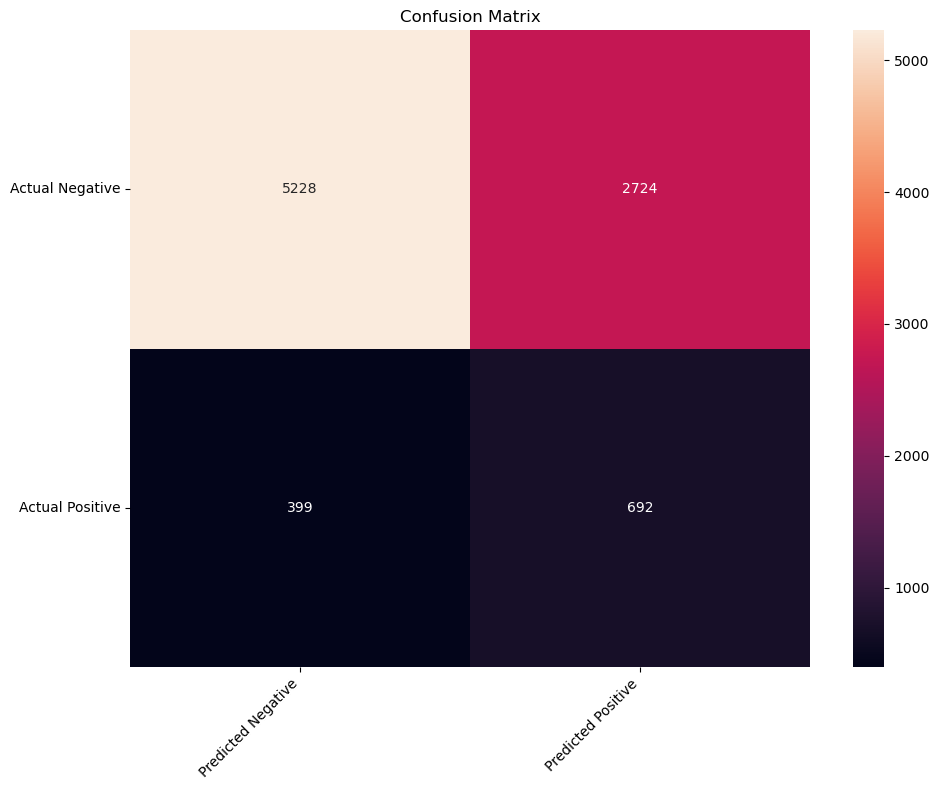

In [3]:
plt.figure(figsize=(10, 8))
sns.heatmap(Conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)  # Adjust rotation as needed
plt.tight_layout()
plt.show()

In [4]:
pip install seaborn --upgrade 

In [5]:
feature_importance_df

,Feature,Importance
0,housing_yes,0.360667
1,housing_no,0.250563
2,pdays,0.140163
3,contact_unknown,0.137649
4,poutcome_failure,0.038318
5,poutcome_success,0.037163
6,marital_married,0.030895
7,month_oct,0.002810
8,month_may,0.001247
9,age,0.000525


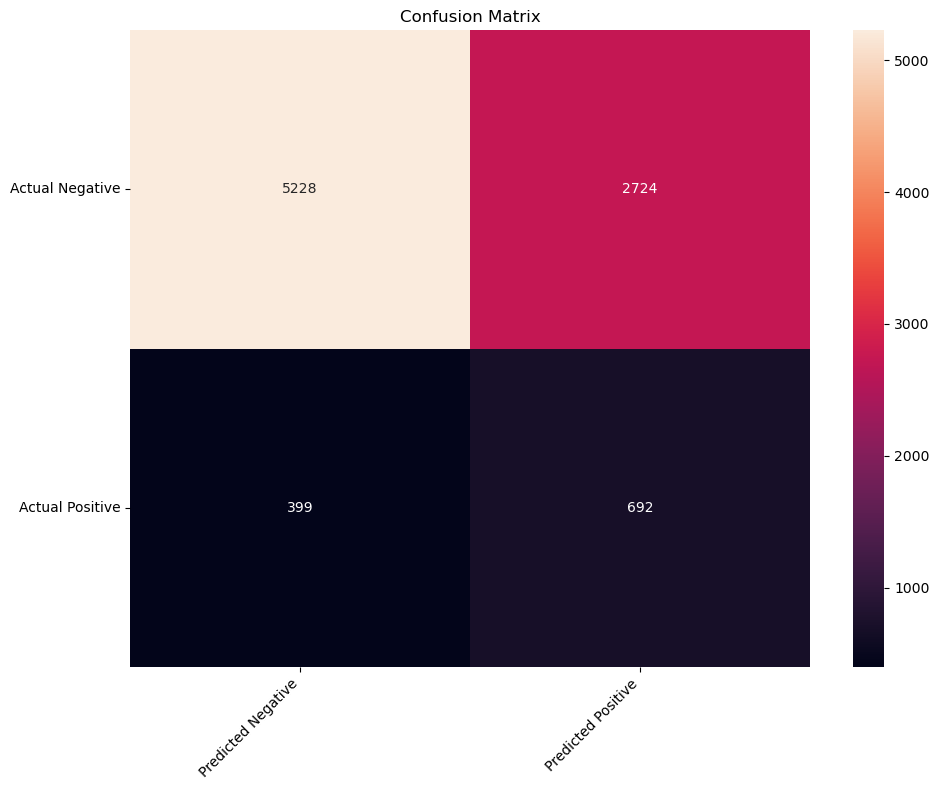

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(Conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better fit
plt.yticks(rotation=0)  # Adjust rotation as needed
plt.tight_layout()
plt.show()

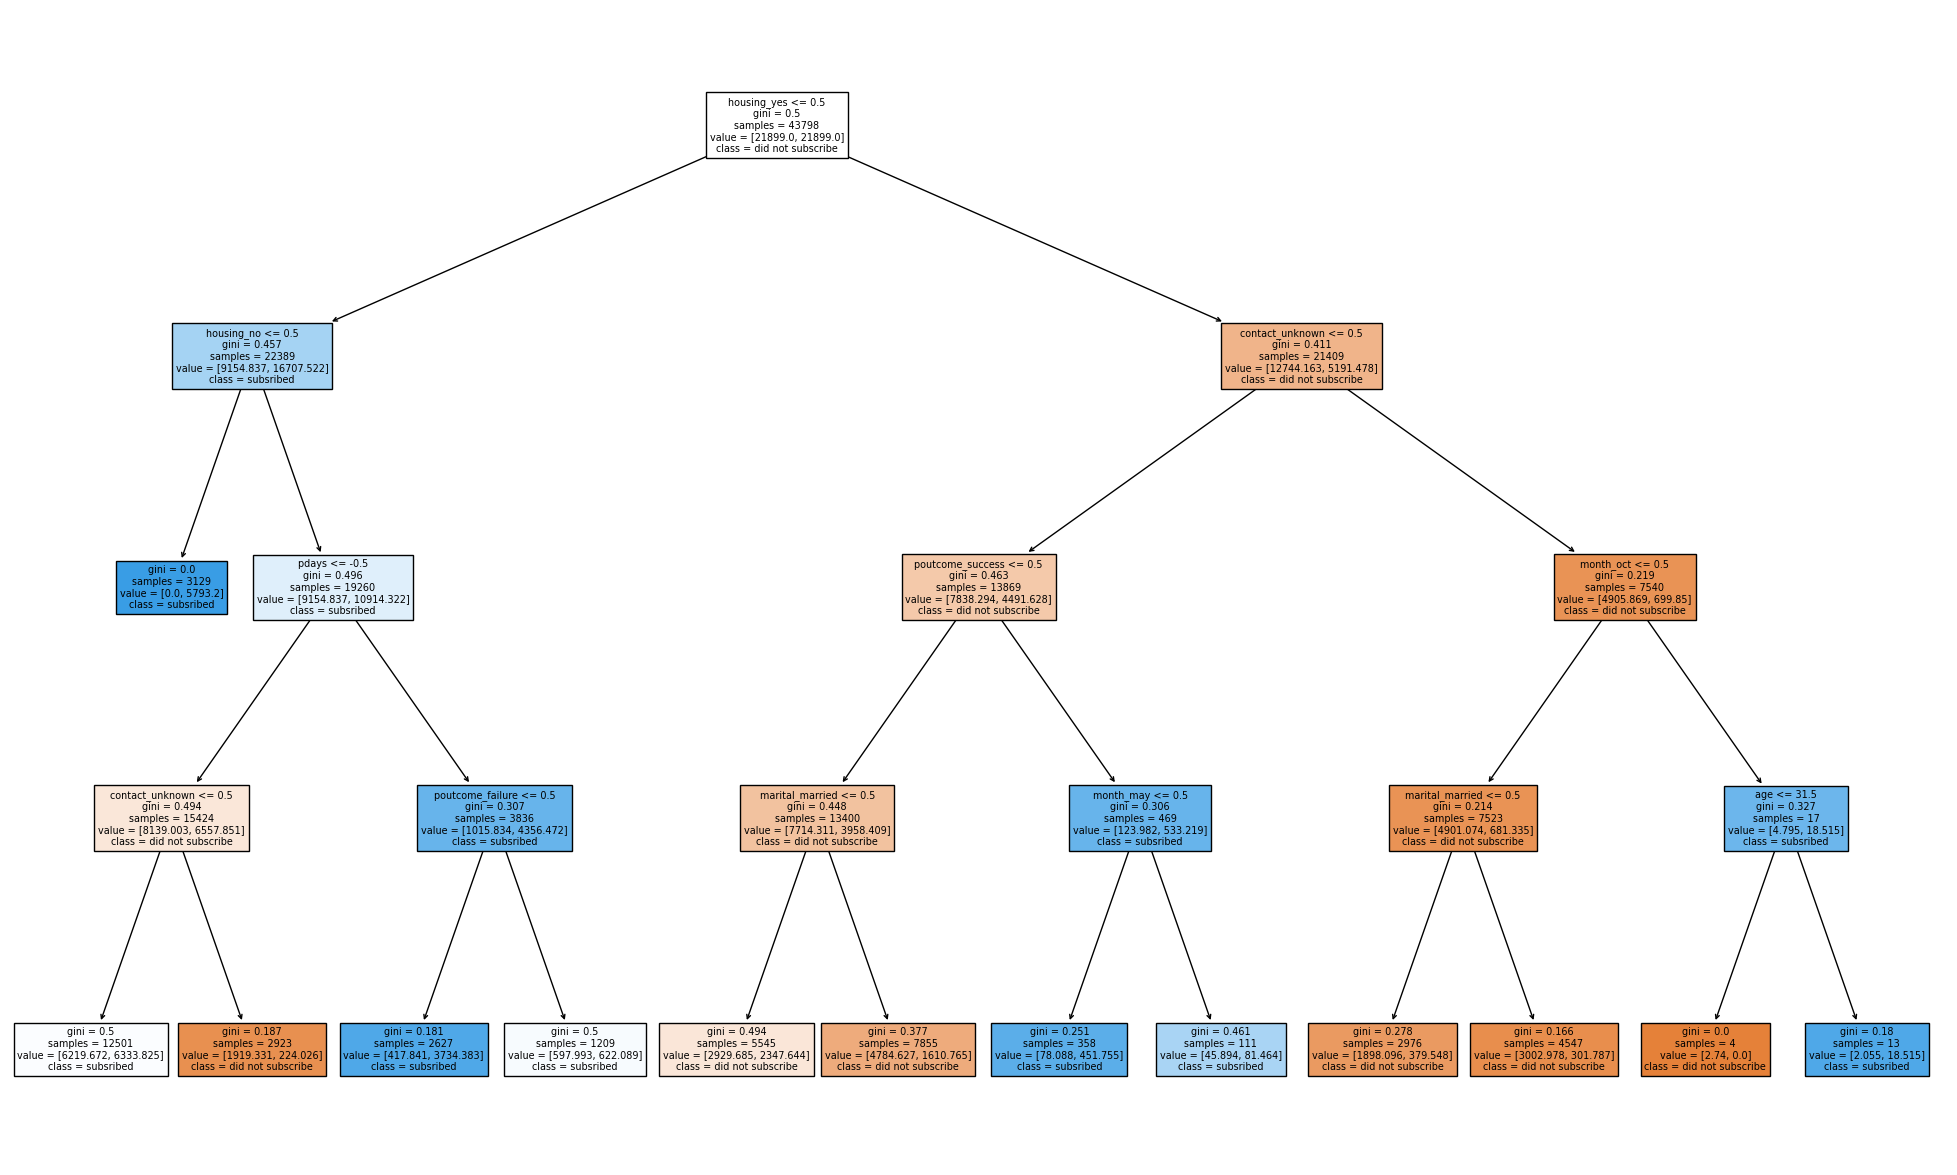

In [9]:
# plotting the decision tree
# This plot shows us how the tree was built
# the data at each node
# the Gini values

from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,15))

_ = tree.plot_tree(model,
              feature_names = X_train_smote.columns,
               class_names = ['did not subscribe','subsribed'],
               filled=True
              )

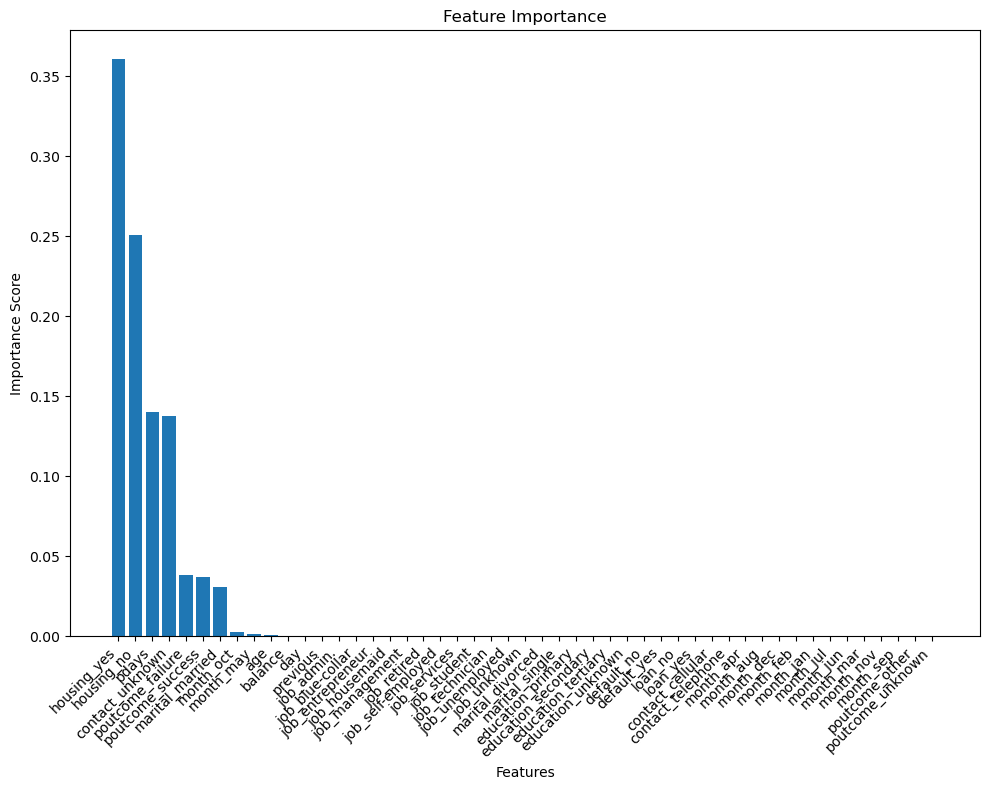

In [10]:
import matplotlib.pyplot as plt

# Assuming dt.feature_names_in_ and dt.feature_importances_ are defined
# Zipping together the feature names and their scores
f_i = list(zip(model.feature_names_in_, model.feature_importances_))

# Sorting by scores, highest first
f_i.sort(key=lambda x: x[1], reverse=True)

# Setting the size of the plot
plt.figure(figsize=(10, 8)) # You can adjust the size here

# Plotting these scores
plt.bar([x[0] for x in f_i], [x[1] for x in f_i])

# Adding labels and title
plt.xticks(rotation=45, ha="right") # Rotating x-axis labels for better readability
plt.xlabel('Features') # X-axis label
plt.ylabel('Importance Score') # Y-axis label
plt.title('Feature Importance') # Title

# Optionally, you can make the text larger with:
plt.rc('xtick', labelsize=10) # Adjust as necessary
plt.rc('ytick', labelsize=10) # Adjust as necessary
plt.rc('axes', labelsize=12) # Adjust for x and y labels
plt.rc('axes', titlesize=14) # Adjust for title

plt.tight_layout() # Adjust layout to not cut off labels
plt.show()

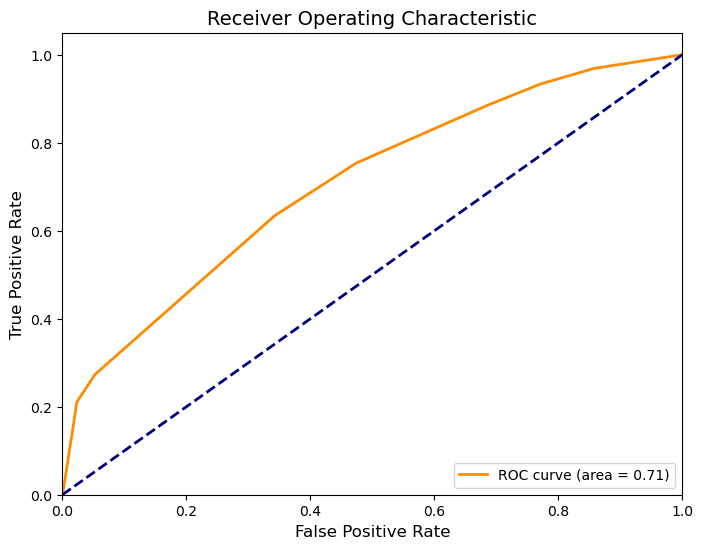

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score 

dataset = pd.read_csv('direct_marketing_dataset.csv', sep=';')

#encoding the categorical data columns using pd.get_dummies
dataset = pd.get_dummies(dataset, columns = ['job', 'marital','education','default', 'housing', 'loan','contact', 'month','poutcome'])

# Defining columns for the model
X = dataset.drop(["campaign", "duration","y"], axis =1)
y = dataset['y']

# splitting the data into train and test 80/20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy = 0.37, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#drop index for y
y_train_smote_reset = y_train_smote.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

#recreate both train and test dataframes
#train = pd.concat([X_train_smote, y_train_smote_reset], axis=1)
#test = pd.concat([X_test, y_test_reset], axis=1)

# Importing Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# calling the decision tree method 
# setting max_depth to 4
# and min sample per leaf at 1
# this mean ther must be at least 1 samples in each leaf
model = DecisionTreeClassifier(max_depth=4, class_weight = 'balanced', min_samples_leaf=1, random_state = 42)
# fitting the decision tree onto the training data
model.fit(X_train_smote, y_train_smote)

##################Evaluating your Decision Tree Model###################

### Generate your predicitions###
y_pred = model.predict(X_test)

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Ensure your model predicts probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='yes') # Adjust pos_label depending on your data
roc_auc = auc(fpr, tpr)

# Alternatively, compute AUC directly
# roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

